In [1]:
import torch
from torch.utils.data import DataLoader

from modeling.networks.dataset.quoraDataset import QuoraDataset
from modeling.networks.quora_duplicate_cnn import QuoraDuplicateCNN
from modeling.networks.train.train_model import train_model
from modeling.networks.utils.loader import save_model_state

%load_ext autoreload
%autoreload 2

In [2]:
embedding_matrix = torch.load("../registry/embeddings/embedding_matrix.pt")

In [3]:
use_gpu = True
DEVICE = "cuda" if use_gpu else "cpu"
DEVICE

'cuda'

In [4]:
data_train = torch.load("../registry/datasets/quora_train_dataset.pt")
X_q1_train = data_train["X_q1"]
X_q2_train = data_train["X_q2"]
y_train = data_train["y"]

In [5]:
y_train.shape

torch.Size([323432])

In [6]:
data_test = torch.load("../registry/datasets/quora_test_dataset.pt")
X_q1_test = data_test["X_q1"]
X_q2_test = data_test["X_q2"]
y_test = data_test["y"]

In [7]:
y_test.shape

torch.Size([80858])

In [8]:
model = QuoraDuplicateCNN(embedding_matrix)
X_q1_batch = X_q1_train[:32]
X_q2_batch = X_q2_train[:32]

output = model(X_q1_batch, X_q2_batch)
print(output.shape)

torch.Size([32])


In [9]:
train_dataset = QuoraDataset(X_q1_train, X_q2_train, y_train)
val_dataset = QuoraDataset(X_q1_test, X_q2_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

Using device: cuda


Training: 100%|██████████ [Elapsed: 03:21 | Remaining: 00:00]  



|Epoch 1/10| Train Loss: 0.4249; Val Loss: 0.3846; Val F1: 0.7130


Training: 100%|██████████ [Elapsed: 04:15 | Remaining: 00:00]



|Epoch 2/10| Train Loss: 0.3450; Val Loss: 0.3699; Val F1: 0.7483


Training: 100%|██████████ [Elapsed: 03:20 | Remaining: 00:00]



|Epoch 3/10| Train Loss: 0.2965; Val Loss: 0.3770; Val F1: 0.7626


Training: 100%|██████████ [Elapsed: 03:19 | Remaining: 00:00]



|Epoch 4/10| Train Loss: 0.2562; Val Loss: 0.3964; Val F1: 0.7768


Training: 100%|██████████ [Elapsed: 03:19 | Remaining: 00:00]



|Epoch 5/10| Train Loss: 0.2244; Val Loss: 0.4081; Val F1: 0.7736
EarlyStopping patience: 1/3


Training: 100%|██████████ [Elapsed: 03:19 | Remaining: 00:00]



|Epoch 6/10| Train Loss: 0.1989; Val Loss: 0.4427; Val F1: 0.7821


Training: 100%|██████████ [Elapsed: 03:19 | Remaining: 00:00]



|Epoch 7/10| Train Loss: 0.1796; Val Loss: 0.4802; Val F1: 0.7874


Training: 100%|██████████ [Elapsed: 03:23 | Remaining: 00:00]



|Epoch 8/10| Train Loss: 0.1638; Val Loss: 0.5074; Val F1: 0.7698
EarlyStopping patience: 1/3


Training: 100%|██████████ [Elapsed: 03:27 | Remaining: 00:00]



|Epoch 9/10| Train Loss: 0.1521; Val Loss: 0.5428; Val F1: 0.7723
EarlyStopping patience: 2/3


Training: 100%|██████████ [Elapsed: 03:20 | Remaining: 00:00]



|Epoch 10/10| Train Loss: 0.1424; Val Loss: 0.5904; Val F1: 0.7704
EarlyStopping patience: 3/3
Early stopping triggered at epoch 10

Best Val F1: 0.7874


          Model Evaluation Metrics           
┏━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Train Value ┃ Validation Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ f1_score │      0.9179 │           0.7704 │
│ roc_auc  │      0.9872 │           0.9083 │
└──────────┴─────────────┴──────────────────┘

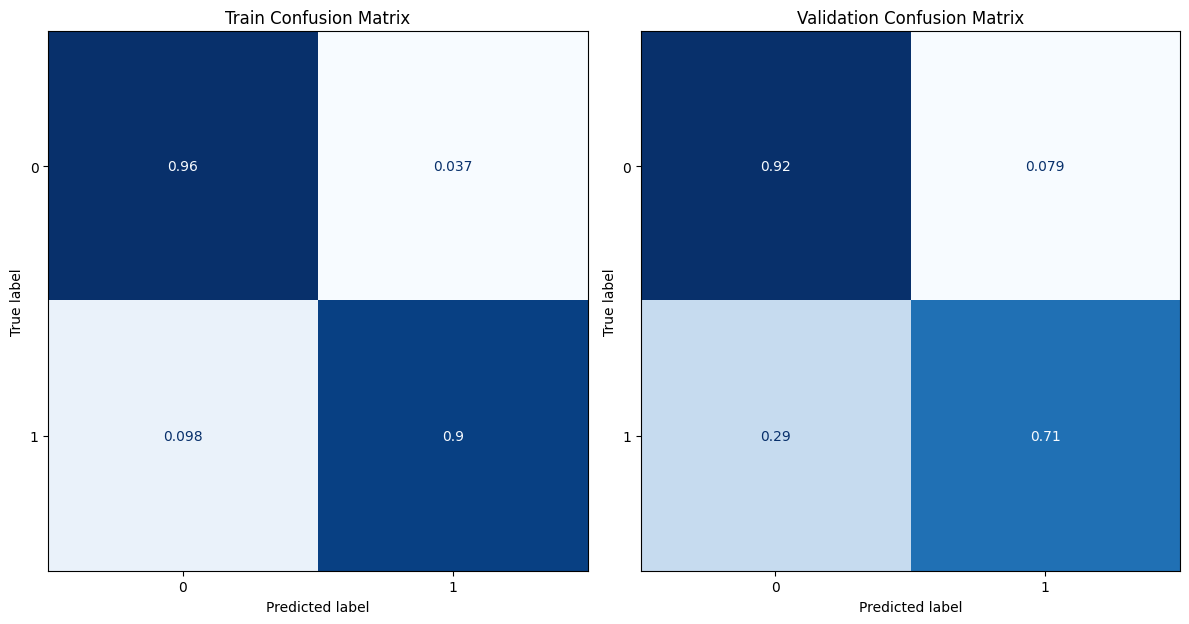

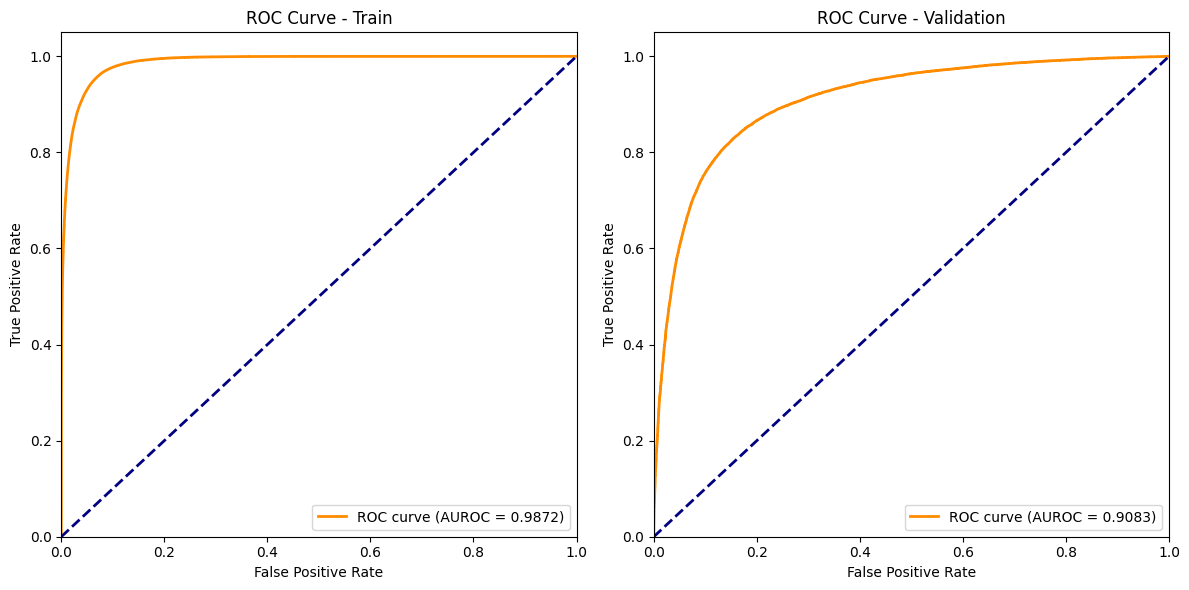

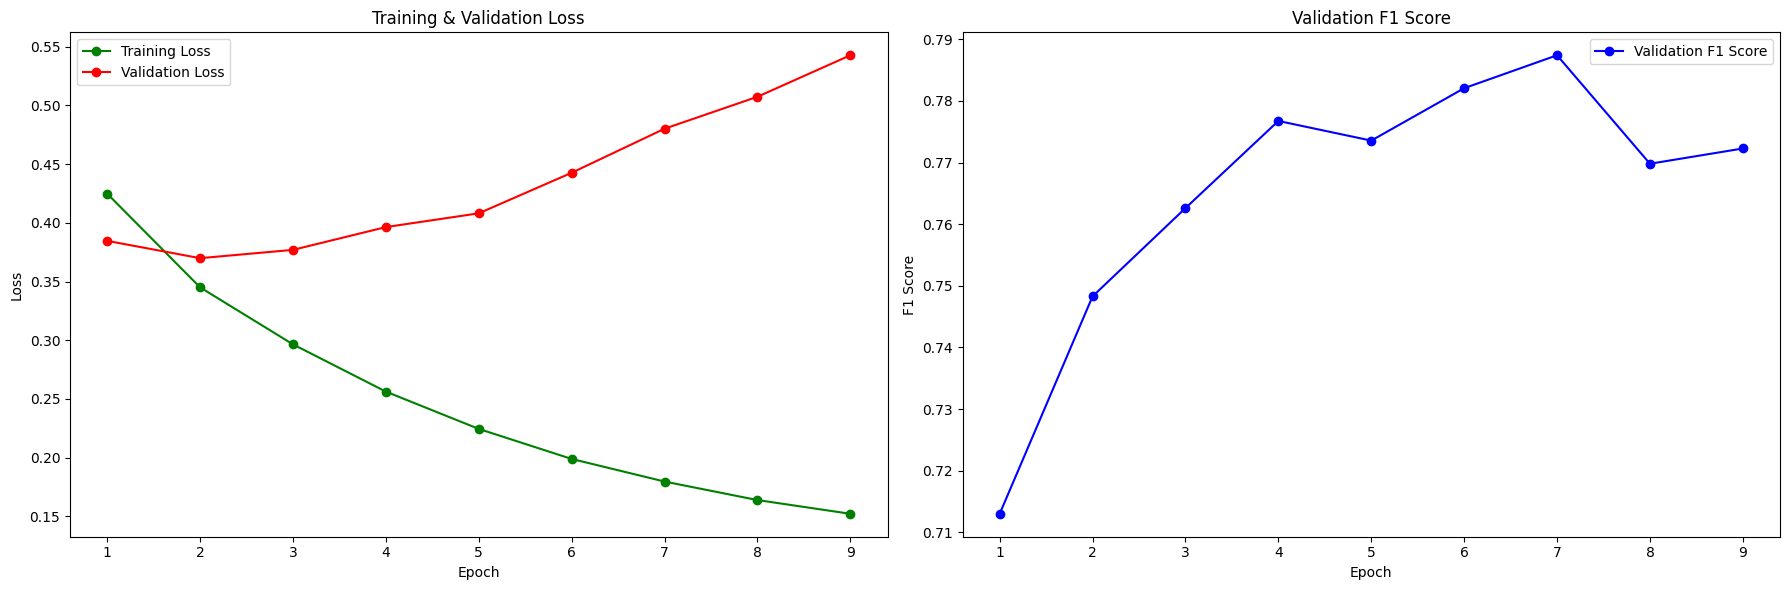

(QuoraDuplicateCNN(
   (embedding): Embedding(50000, 300, padding_idx=0)
   (conv): Conv1d(300, 128, kernel_size=(3,), stride=(1,), padding=(1,))
   (relu): ReLU()
   (pool): AdaptiveMaxPool1d(output_size=1)
   (dropout): Dropout(p=0.3, inplace=False)
   (fc): Linear(in_features=512, out_features=1, bias=True)
 ),
 {'train_loss': [0.4248738424954947,
   0.3450495457814046,
   0.2964839136307572,
   0.2562174761957527,
   0.22444217739704897,
   0.19885204476460985,
   0.17960436364118382,
   0.16383332549884574,
   0.1521276845662148],
  'val_loss': [0.38464637681529323,
   0.3698995995589948,
   0.376975175336764,
   0.3963829449819844,
   0.40811641470222876,
   0.4426689643367128,
   0.4801836251876408,
   0.5074154079361399,
   0.5427712665433687],
  'val_f1': [0.7130072840790843,
   0.7482885535517114,
   0.7626113825812015,
   0.7767518606937228,
   0.7735615923213295,
   0.7820642859641146,
   0.7874108070081405,
   0.7698070457535447,
   0.7722825599138318]})

In [10]:
train_model(model, train_loader, val_loader, num_epochs=10, device=DEVICE)

In [11]:
save_model_state(model, path="../registry/models/cnn/cnn_model.pt")

Model state_dict saved to: C:\Users\altsh\PycharmProjects\duplicate_question_classifier_assigment\registry\models\cnn\cnn_model.pt
